# Anticipez les besoins en consommation de bâtiments

## Notebook d'exploration

J'importe les librairies nécessaires.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

J'importe mon fichier grâce la fonction read.

In [4]:
data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


### 1) Triage du dataset.

Premièrement, je vais garder les lignes qui ne contiennent pas d'outliers.

In [5]:
data = data.loc[data["Outlier"].isnull()]

Je vais ensuite regarder les différents niveaux de conformité des données.

In [6]:
data.groupby("ComplianceStatus").sum()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,TotalGHGEmissions,GHGEmissionsIntensity
ComplianceStatus,,,,,,,,,,,,,,,,,,,,,
Compliant,68763065,6473376,313777835.0,14375,152922.410628,-392818.122612,6321623,3564.0,15428,307595279,...,1.730507e+10,9.151453e+08,3.572177e+09,1.218827e+10,4.449748e+07,4.449748e+09,0,0.0,391933.52,3813.59
Error - Correct Default Data,1855587,223776,10596807.0,384,5284.936669,-13577.862606,218529,110.0,284,8119211,...,3.386216e+08,7.145237e+05,5.532614e+07,1.887728e+08,1.216626e+06,1.216626e+08,111,0.0,7832.64,97.31
Missing Data,115896,30240,1471910.0,65,714.432080,-1835.120930,29581,15.0,29,1105497,...,0.000000e+00,0.000000e+00,3.410930e+06,1.163809e+07,1.347595e+05,1.347595e+07,0,0.0,796.83,7.60
Non-Compliant,119090,14112,686772.0,40,333.600080,-856.268590,13753,2.0,27,1617921,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.0,0.00,0.00


Je vais garder les lignes conformes et celles dont les données par défaut ont été entrées.

In [7]:
data = data.loc[(data["ComplianceStatus"] == "Compliant")
               | (data["ComplianceStatus"] == "Error - Correct Default Data")]

Le problème concerne les bâtiments qui ne sont pas déstinés à l'habitation. Je regarde les différents types de bâtiments disponibles, puis je vais supprimer les bâtiments résidentiels.

In [8]:
data.groupby("PrimaryPropertyType").sum()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,TotalGHGEmissions,GHGEmissionsIntensity
PrimaryPropertyType,,,,,,,,,,,,,,,,,,,,,
Distribution Center,705100,106848,5200588.0,122,2521.305360,-6483.649120,103964,56.0,69,3417544,...,1.365125e+08,0.000000e+00,2.609976e+07,8.905238e+07,3.843170e+05,3.843170e+07,0,0.0,2661.96,40.42
High-Rise Multifamily,2760916,209664,10203553.0,598,4952.149720,-12722.881610,206034,103.0,1846,21627824,...,9.358940e+08,2.203355e+07,1.629667e+08,5.560424e+08,3.294050e+06,3.294050e+08,1,0.0,23071.84,117.94
Hospital,150730,20160,981164.0,35,476.350131,-1223.281712,19751,43.0,69,6213004,...,1.415812e+09,3.314040e+08,2.072448e+08,7.071191e+08,3.769468e+06,3.769468e+08,0,0.0,50529.63,74.11
Hotel,642016,153216,7456246.0,453,3619.324457,-9297.503057,149417,76.0,717,12419512,...,9.853577e+08,1.485579e+08,1.476572e+08,5.038063e+08,3.136013e+06,3.136013e+08,0,0.0,31634.46,190.42
K-12 School,2004329,249984,12166738.0,442,5905.241520,-15168.255690,243632,133.0,269,9535378,...,4.252586e+08,5.482947e+05,5.595161e+07,1.909069e+08,1.925384e+06,1.925384e+08,74,0.0,11598.87,172.53
Laboratory,187068,20160,981102.0,62,476.236870,-1223.416590,19725,8.0,41,1203211,...,2.686936e+08,3.103019e+07,3.949300e+07,1.347501e+08,9.715096e+05,9.715096e+07,0,0.0,8494.24,86.71
Large Office,854754,342720,16678621.0,1027,8094.348620,-20797.375210,336161,180.0,2292,61812884,...,2.958927e+09,8.636372e+07,7.914360e+08,2.700380e+09,1.814422e+06,1.814422e+08,1,0.0,35128.06,119.09
Low-Rise Multifamily,24311616,1957536,95273296.0,4159,46255.382824,-118787.642225,1910954,1032.0,3384,41614080,...,1.373423e+09,4.311827e+06,2.761252e+08,9.421391e+08,3.379775e+06,3.379775e+08,15,0.0,24850.69,639.77
Medical Office,490698,78624,3826508.0,152,1857.606158,-4770.501265,77057,38.0,174,6325519,...,4.728738e+08,3.226694e+07,9.755388e+07,3.328538e+08,1.017739e+06,1.017739e+08,0,0.0,10216.24,51.27


In [9]:
data.drop(data.loc[(data["PrimaryPropertyType"] == "High-Rise Multifamily")
        |(data["PrimaryPropertyType"] == "Low-Rise Multifamily")
        |(data["PrimaryPropertyType"] == "Mid-Rise Multifamily")
        |(data["PrimaryPropertyType"] == "Residence Hall")].index, inplace=True)

### 2) Feature engineering.

Je vais remplacer l'année de construction des bâtiments par leur âge pour plus de lisibilité.

In [10]:
data["Age"] = 2022 - data["YearBuilt"]

Je m'occupe maintenant des usages des bâtiments. Les bâtiments qui ont un deuxième et/ou un troisième usage verront leur usage remplacé par "Yes", les autres par "No".

In [11]:
data["SecondLargestPropertyUseType"] = data["SecondLargestPropertyUseType"].apply(lambda x : "No" if x is np.nan else "Yes")
data["ThirdLargestPropertyUseType"] = data["ThirdLargestPropertyUseType"].apply(lambda x : "No" if x is np.nan else "Yes")

Je vais créer une nouvelle variable qui représente la proportion que représente la superficie du bâtiment par rapport à la surface totale de la propriété.

In [12]:
data["ProportionBuildingSurface"] = (data["PropertyGFABuilding(s)"]/data["PropertyGFATotal"])*100

J'analyse la distribution de mes variables cibles "SiteEnergyUseWN(kBtu)" et "TotalGHGEmissions" pour voir si un passage au log est nécessaire.

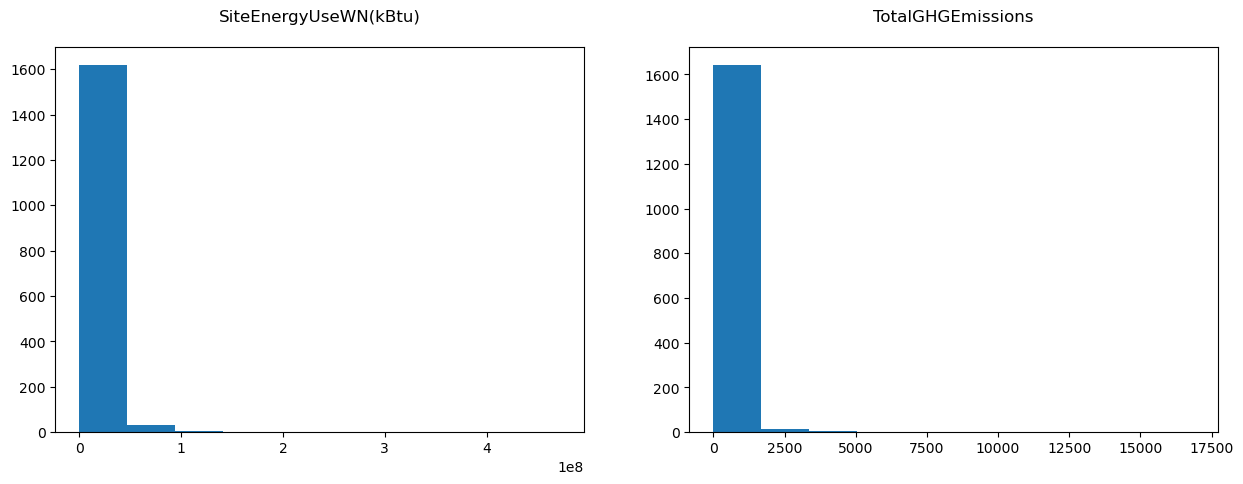

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(data["SiteEnergyUseWN(kBtu)"])
plt.title("SiteEnergyUseWN(kBtu)\n")

plt.subplot(122)
plt.hist(data["TotalGHGEmissions"])
plt.title("TotalGHGEmissions\n")
plt.show()

Je vais passer ces variables au log pour avoir de belles distributions. Avant ça, je supprime toutes les lignes dont la colonne de mes variables cibles sont nulles ou négatives (sinon le calcul du log n'est pas envisageable).

In [14]:
data.drop(data.loc[data["SiteEnergyUseWN(kBtu)"] <= 0].index, inplace = True)
data.drop(data.loc[data["TotalGHGEmissions"] <= 0].index, inplace = True)

In [15]:
data["SiteEnergyUseWN(kBtu)"] = np.log2(data["SiteEnergyUseWN(kBtu)"])
data["TotalGHGEmissions"] = np.log2(data["TotalGHGEmissions"])

J'analyse à nouveau les distributions après le passage au log.

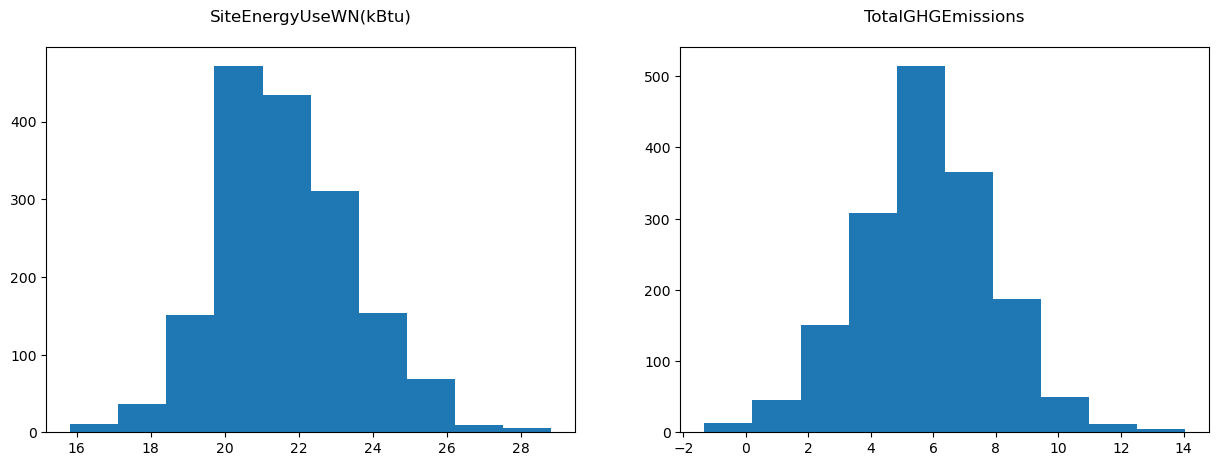

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(data["SiteEnergyUseWN(kBtu)"])
plt.title("SiteEnergyUseWN(kBtu)\n")

plt.subplot(122)
plt.hist(data["TotalGHGEmissions"])
plt.title("TotalGHGEmissions\n")
plt.show()

### 3) Analyse exploratoire.

Je redéfinis mon DataFrame avec les variables qui vont m'aider pour la suite.

In [17]:
data = data.loc[:, ["Age", "NumberofFloors", "NumberofBuildings", "PropertyGFABuilding(s)", "PropertyGFATotal", "LargestPropertyUseTypeGFA", "ProportionBuildingSurface", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType", "PrimaryPropertyType", "TotalGHGEmissions", "SiteEnergyUseWN(kBtu)", "ENERGYSTARScore"]]

J'analyse le taux de remplissage de mes variables.

In [18]:
data.isnull().sum()

Age                               0
NumberofFloors                    0
NumberofBuildings                 0
PropertyGFABuilding(s)            0
PropertyGFATotal                  0
LargestPropertyUseTypeGFA         4
ProportionBuildingSurface         0
SecondLargestPropertyUseType      0
ThirdLargestPropertyUseType       0
PrimaryPropertyType               0
TotalGHGEmissions                 0
SiteEnergyUseWN(kBtu)             1
ENERGYSTARScore                 561
dtype: int64

Je remplace les valeurs manquantes de l'EnergyStarScore par la médiane de l'ensemble des valeurs prises par cette variable.
Et je supprime les valeurs nulles.

In [19]:
data["ENERGYSTARScore"] = data["ENERGYSTARScore"].fillna(data["ENERGYSTARScore"].median())
data = data.dropna()

Je modélise la distribution des usages des bâtiments par un digramme en barre.

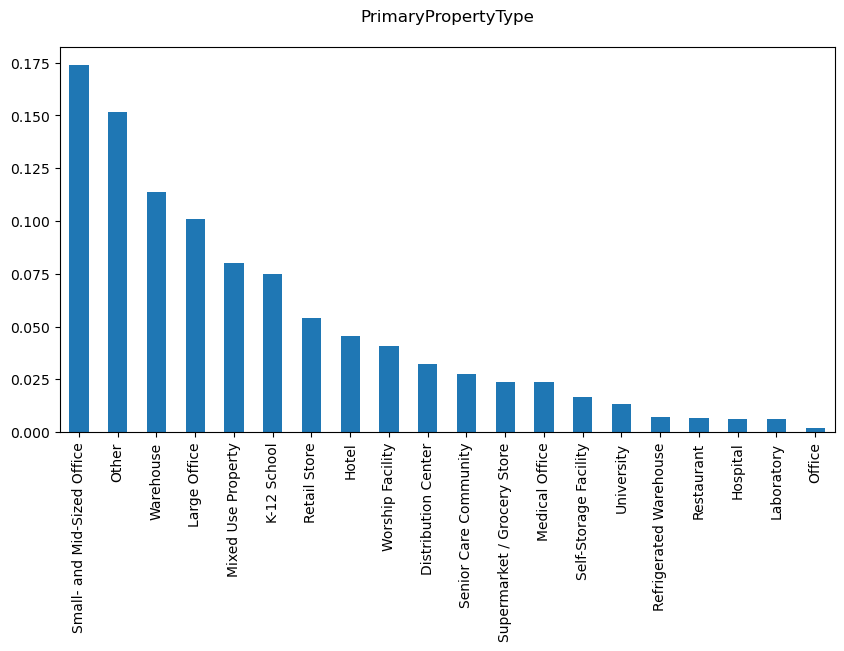

In [20]:
plt.figure(figsize = (10, 5))
data["PrimaryPropertyType"].value_counts(normalize=True).plot(kind='bar')
plt.title("PrimaryPropertyType\n")
plt.show()

Je modélise les distributions de mes variables.

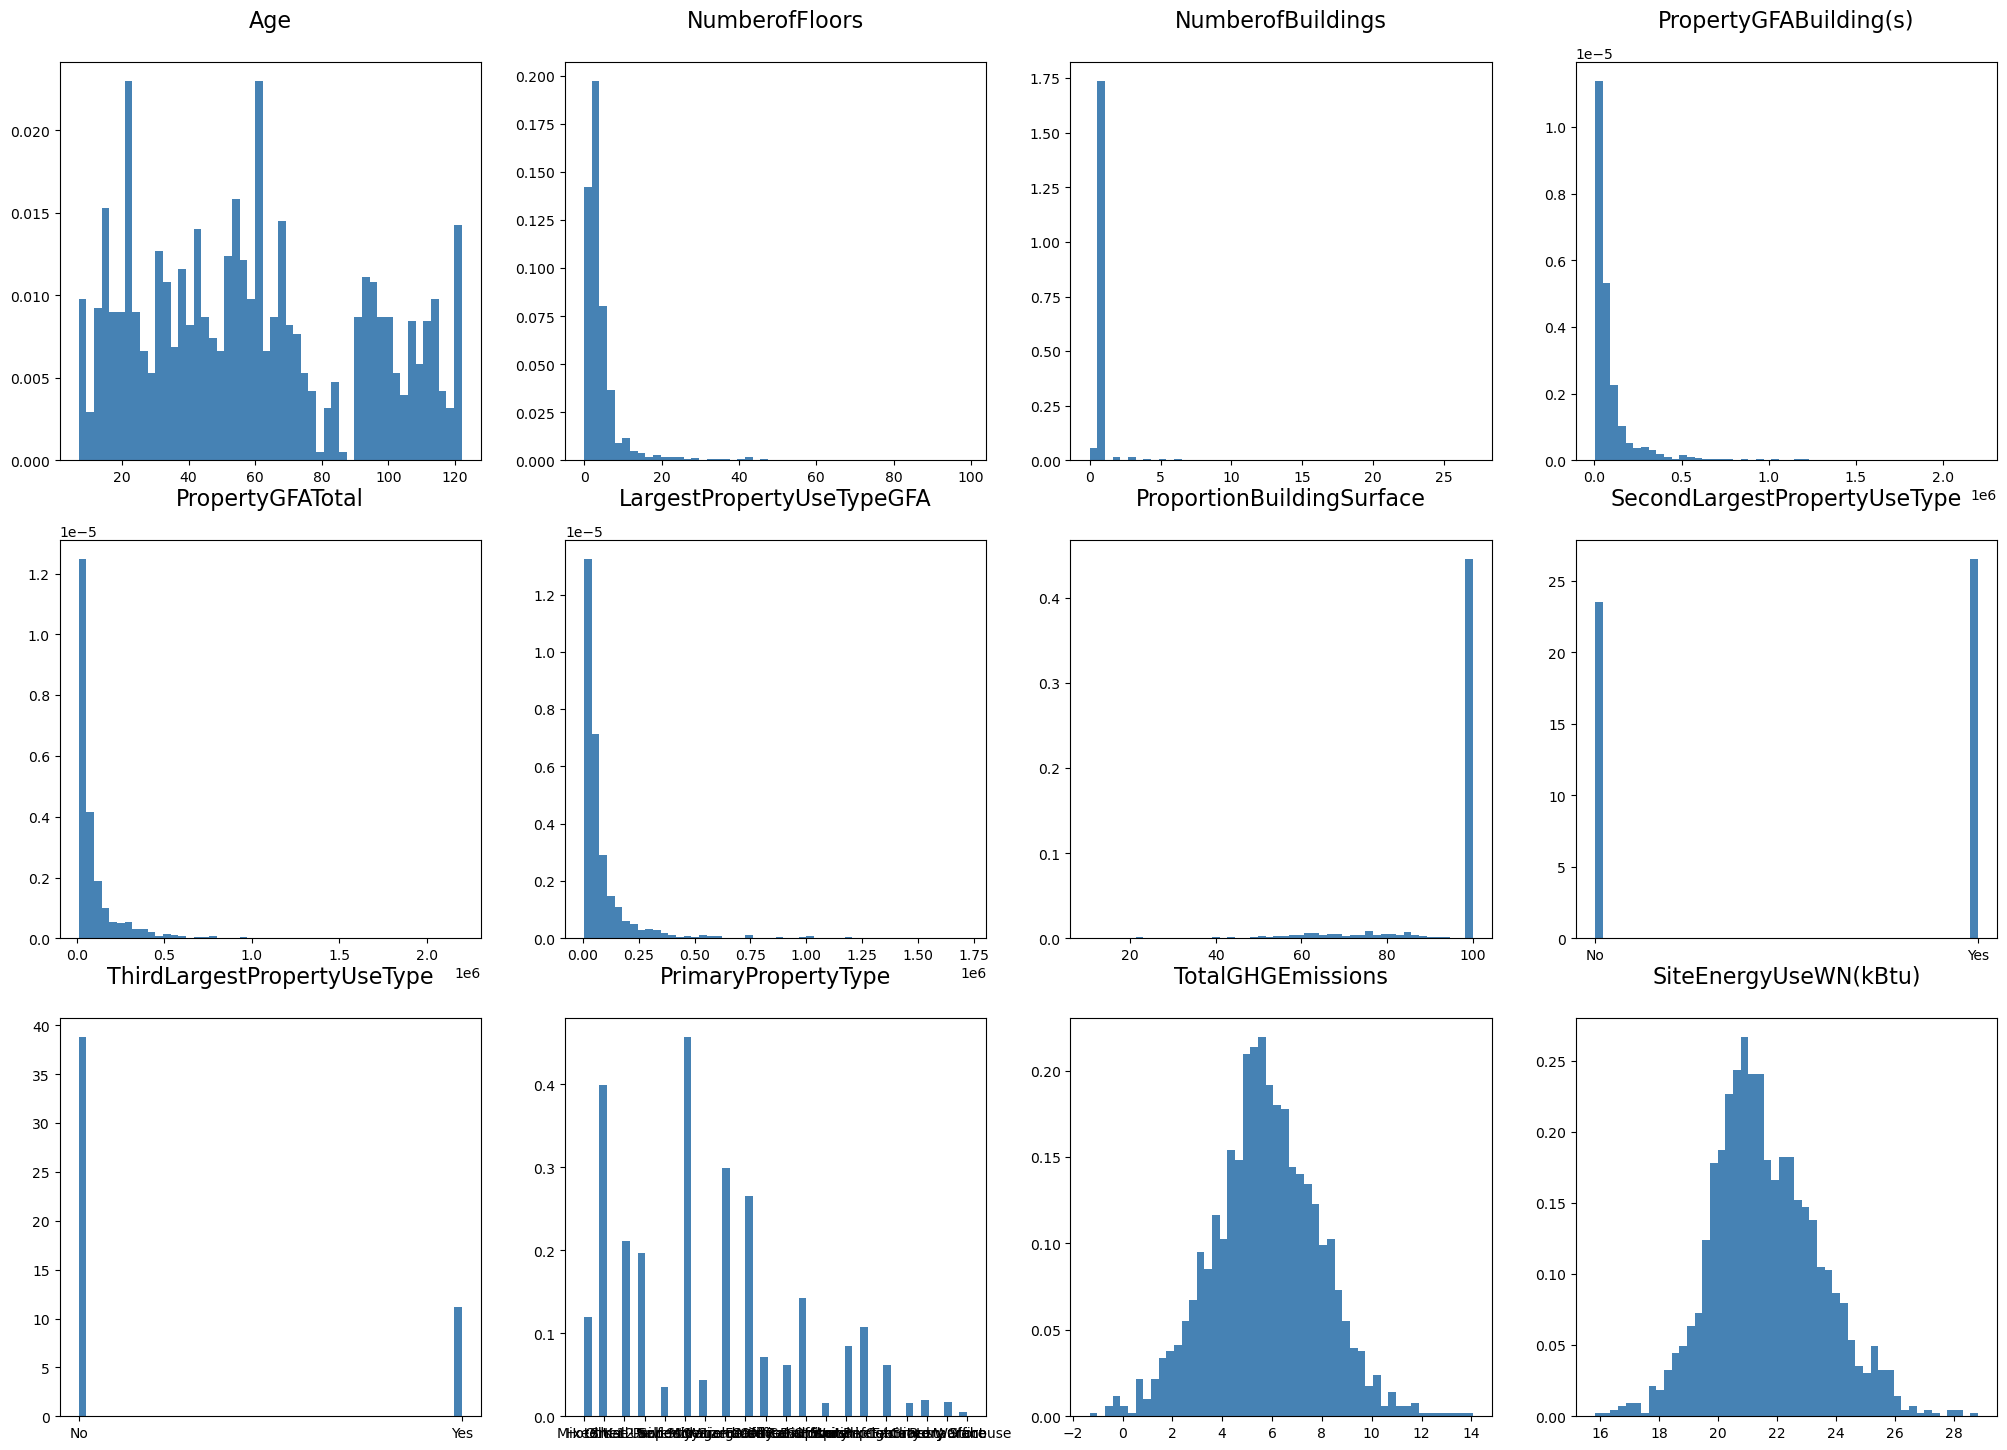

In [21]:
fig = plt.figure(figsize=(25, 30))
for feat_idx in range((data[data.columns[:-1]].values).shape[1]):
    ax = fig.add_subplot(5,4, (feat_idx+1))
    h = ax.hist((data[data.columns[:-1]].values)[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data.columns[feat_idx]+"\n", fontsize=16)


J'analyse ensuite la consommation d'energie et les émissions de CO2 en fonction d'autres paramètres intéressants à l'aide d'un pairplot.

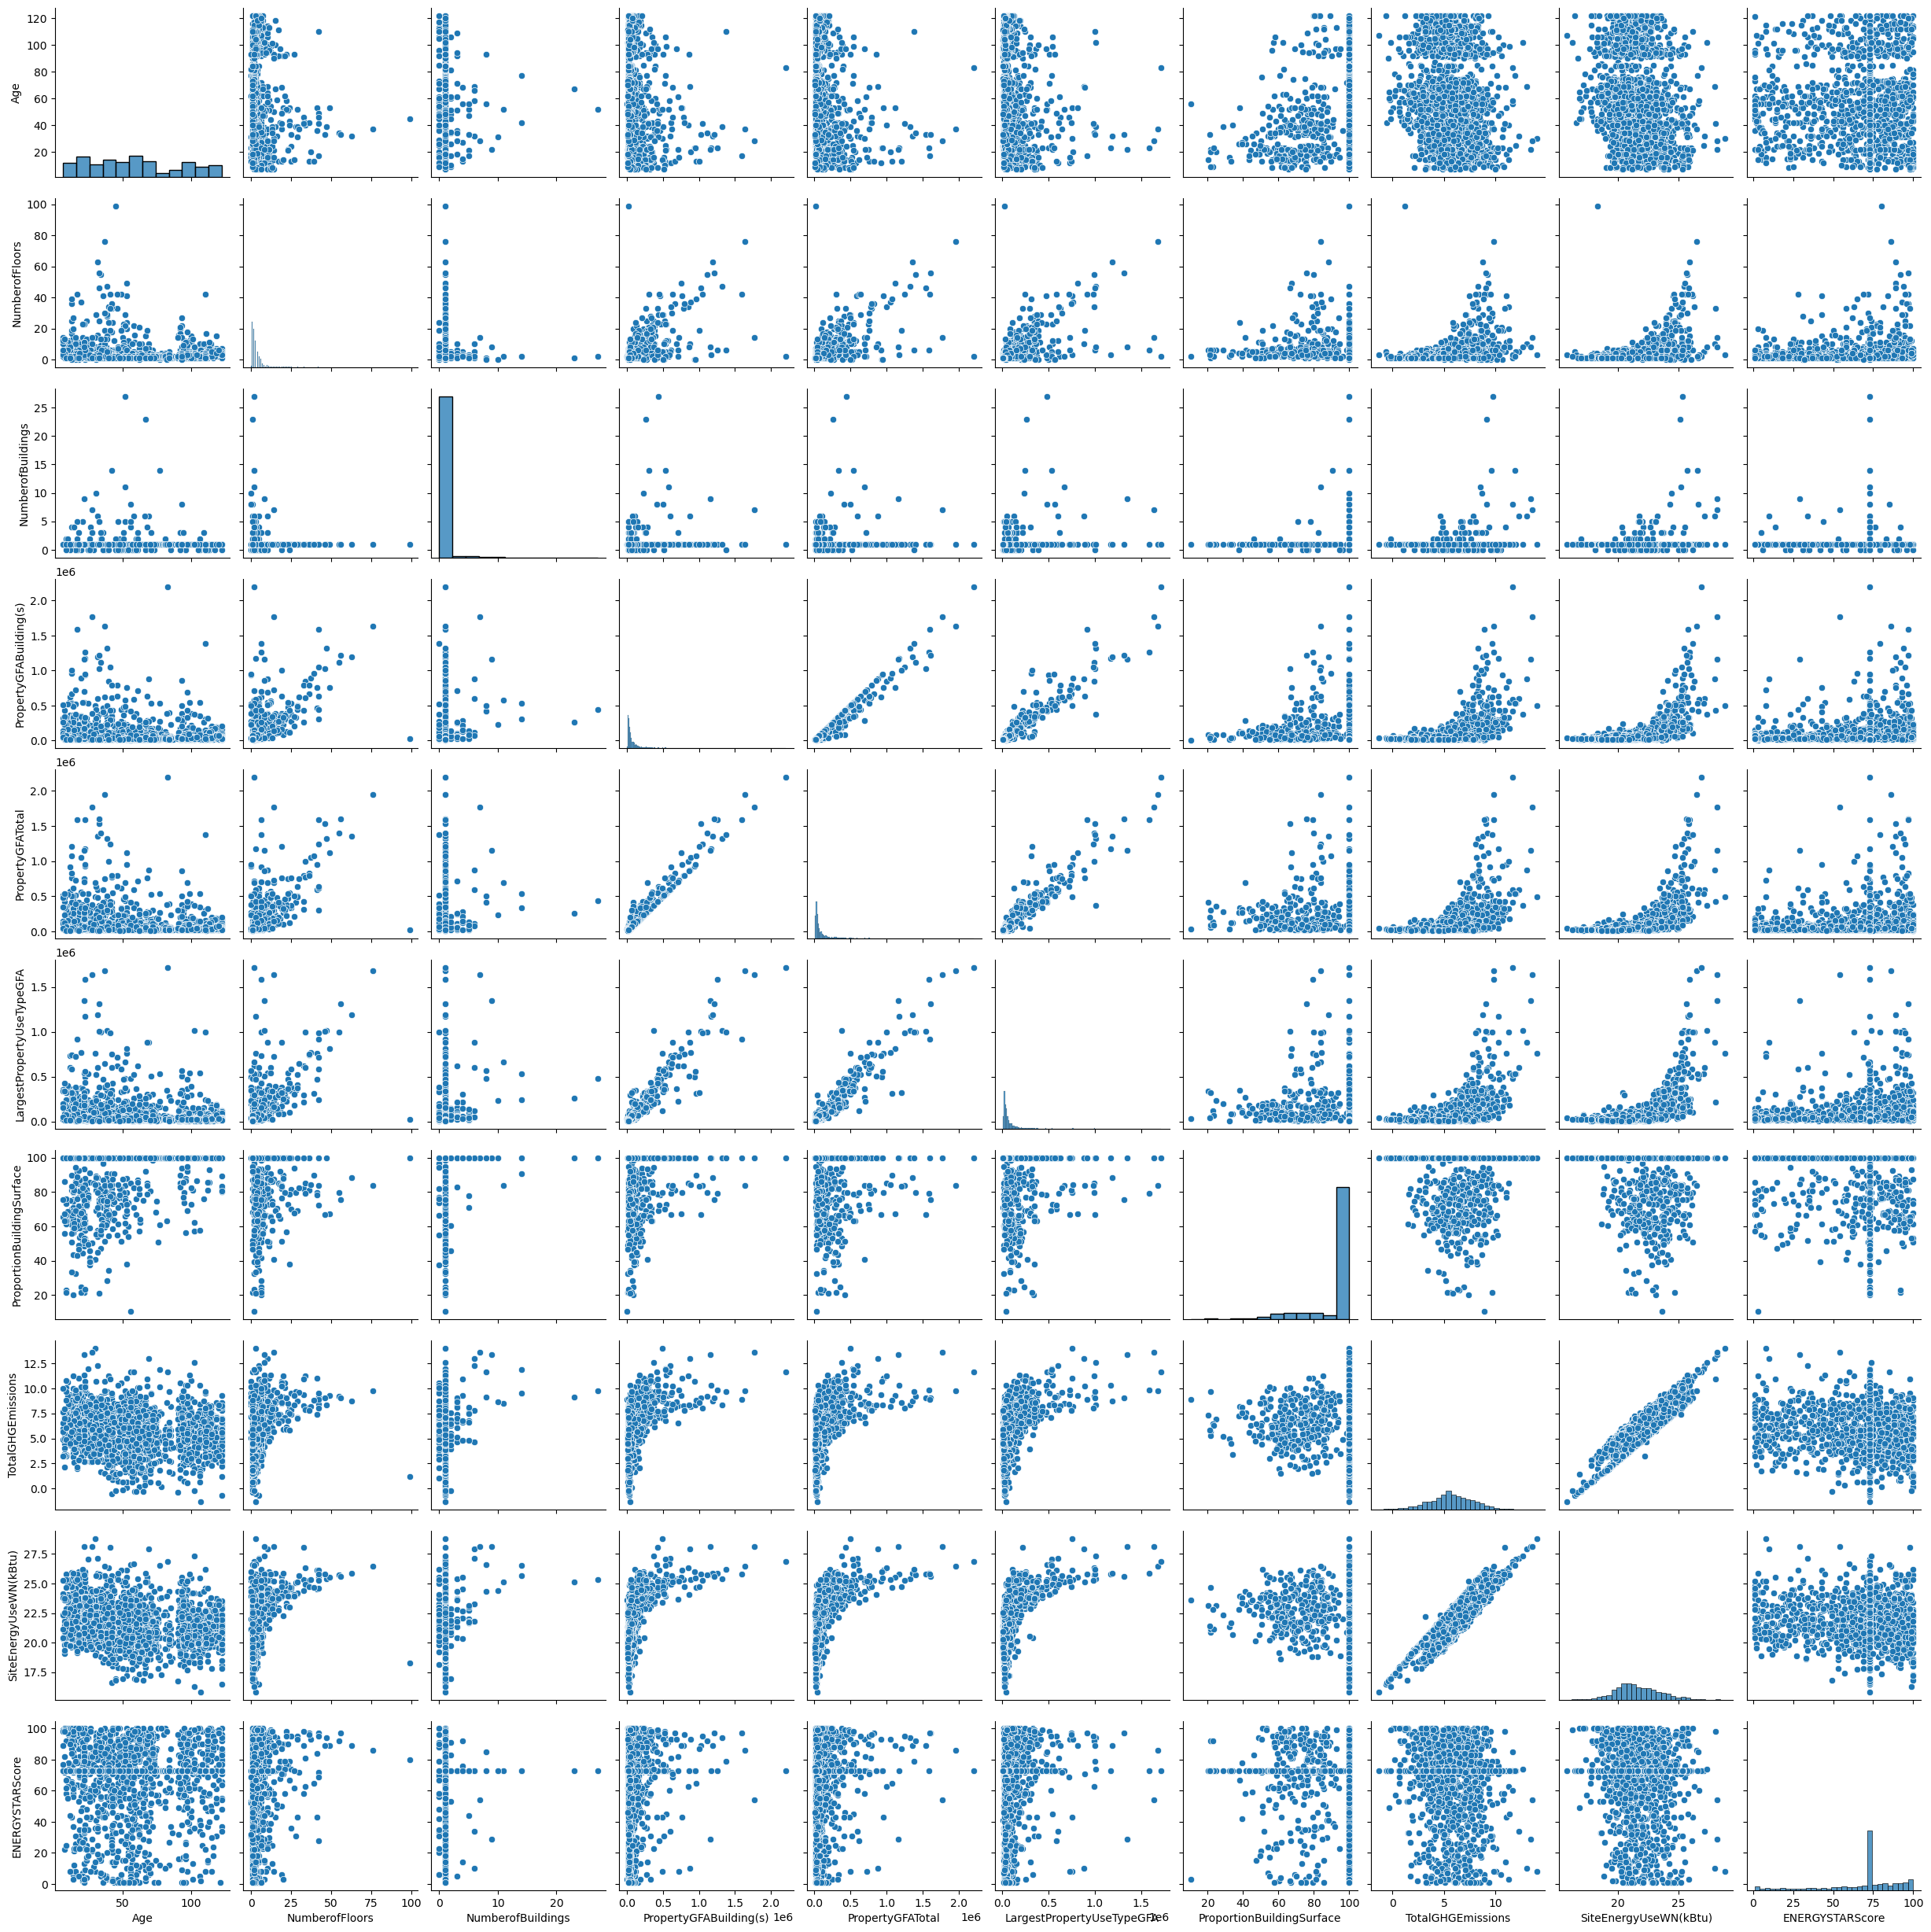

In [22]:
sns.pairplot(data)
plt.show(block = True)

J'analyse les corrélations entre mes variables.

In [23]:
data.corr()

,Age,NumberofFloors,NumberofBuildings,PropertyGFABuilding(s),PropertyGFATotal,LargestPropertyUseTypeGFA,ProportionBuildingSurface,TotalGHGEmissions,SiteEnergyUseWN(kBtu),ENERGYSTARScore
Age,1.000000,-0.100810,-0.031829,-0.169043,-0.210586,-0.178951,0.335783,-0.157025,-0.250315,0.020188
NumberofFloors,-0.100810,1.000000,-0.024448,0.606673,0.648973,0.610122,-0.189096,0.303923,0.422785,0.084801
NumberofBuildings,-0.031829,-0.024448,1.000000,0.170744,0.148737,0.199611,0.024943,0.163879,0.172298,-0.000131
PropertyGFABuilding(s),-0.169043,0.606673,0.170744,1.000000,0.979716,0.948332,-0.083119,0.489280,0.606277,0.085489
PropertyGFATotal,-0.210586,0.648973,0.148737,0.979716,1.000000,0.949616,-0.221603,0.488574,0.620055,0.091805
LargestPropertyUseTypeGFA,-0.178951,0.610122,0.199611,0.948332,0.949616,1.000000,-0.138223,0.500328,0.612801,0.075828
ProportionBuildingSurface,0.335783,-0.189096,0.024943,-0.083119,-0.221603,-0.138223,1.000000,-0.131060,-0.256348,0.007719
TotalGHGEmissions,-0.157025,0.303923,0.163879,0.489280,0.488574,0.500328,-0.131060,1.000000,0.901574,-0.110114
SiteEnergyUseWN(kBtu),-0.250315,0.422785,0.172298,0.606277,0.620055,0.612801,-0.256348,0.901574,1.000000,-0.124277
ENERGYSTARScore,0.020188,0.084801,-0.000131,0.085489,0.091805,0.075828,0.007719,-0.110114,-0.124277,1.000000


In [24]:
os.makedirs('data', exist_ok=True)  
data.to_csv('data.csv') 